In [23]:
import utilities as ut
import construction as cs
import singleDatasetAnalysis as san
import multipleDatasetAnalysis as man
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


%load_ext autoreload
%autoreload 2


from IPython.core.display import HTML
HTML('<style>.container { width:97% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import dinamica as dy

In [11]:
path = "data/co-presence/InVS13.dat"
metadata_path = "data/co-presence/metadata/metadata_InVS13.dat"
gap = 1000

data = cs.split_data_in_groups(path,metadata_path)

data = data["Mixed"]
graphs, pos = cs.build_graphs(data,gap = gap)

------------  -----  -----  -----  ----  -----  ------  ------
Name          DISQ   DMCT   DSE    SFLE  SRH    Mixed   TOT
interactions  37129  89334  96976  124   38306  132378  394247
nodes         16     27     35     4     13     95      95
------------  -----  -----  -----  ----  -----  ------  ------


In [28]:
probability = 0.01
percent, frequences = dy.simulate_n_times(times = 50,
                                            graphs = graphs,
                                            probability = probability,
                                            initial_node = None,
                                            seed = None)

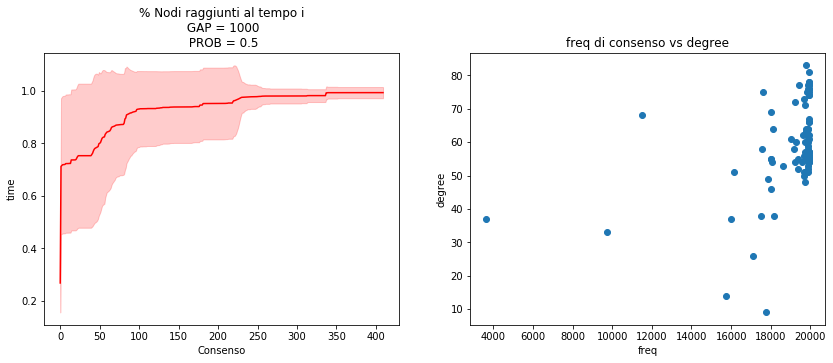

In [24]:
plt_tmp(percent,frequences,gap,probability)

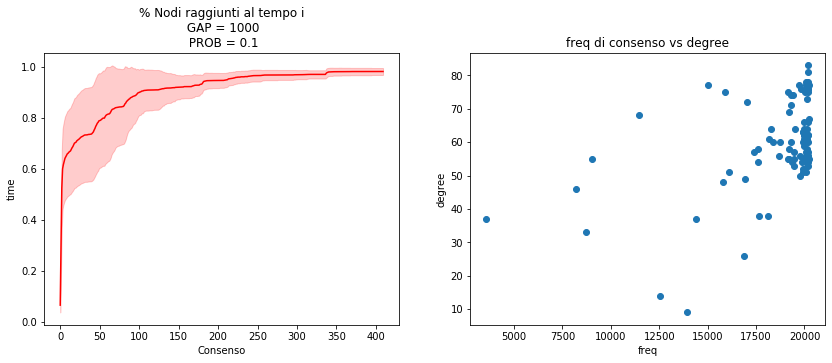

In [27]:
plt_tmp(percent,frequences,gap,probability)

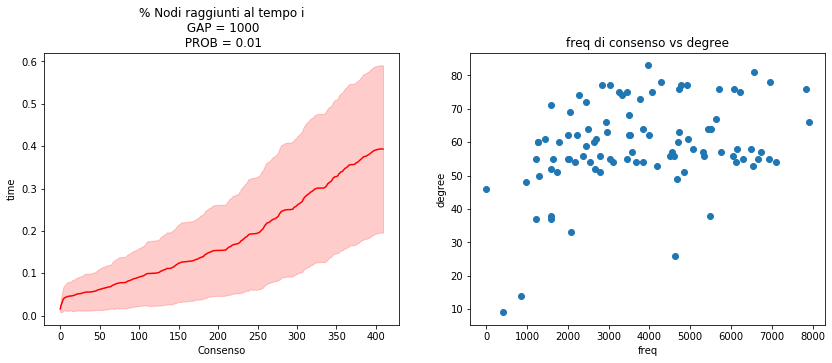

In [29]:
plt_tmp(percent,frequences,gap,probability)

In [38]:
path = "data/co-presence/InVS13.dat"
metadata_path = "data/co-presence/metadata/metadata_InVS13.dat"
gap = 1000

data = cs.split_data_in_groups(path,metadata_path)

data = data["DMCT"]
graphs, pos = cs.build_graphs(data,gap = gap)


probability = 0.01
percent, frequences = dy.simulate_n_times(times = 50,
                                            graphs = graphs,
                                            probability = probability,
                                            initial_node = None,
                                            seed = None)

------------  -----  -----  -----  ----  -----  ------  ------
Name          DISQ   DMCT   DSE    SFLE  SRH    Mixed   TOT
interactions  37129  89334  96976  124   38306  132378  394247
nodes         16     27     35     4     13     95      95
------------  -----  -----  -----  ----  -----  ------  ------


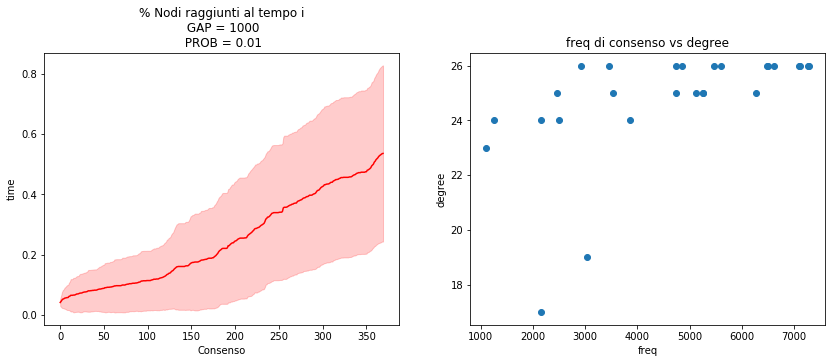

In [39]:
plt_tmp(percent,frequences,gap,probability)

In [21]:
def plt_tmp(percent,frequences,gap,probability):
    percent_mean = np.mean(percent,0)
    percent_std = np.std(percent,0)
    low = percent_mean - (percent_std)
    high = percent_mean + (percent_std)

    plt.figure(figsize=(14,5))
    plt.subplot(121)
    plt.plot(percent_mean, color="red",label = "avg")
    plt.fill_between(range(len(percent_mean)),low,high,alpha=0.2,label = "std",color="red")
    plt.title("% Nodi raggiunti al tempo i\n GAP = "+str(gap)+"\n PROB = "+str(probability))
    plt.xlabel("Consenso")
    plt.ylabel("time")


    G = cs.build_weighted_graph(data, gap = gap)
    degrees_dict = nx.degree(G) #  ut.get_weights(G,dictionary=True)
    freq_dict = get_cumulative_freq(frequences)

    deg = []
    freq = []

    for i in list(freq_dict.keys()):
        deg.append(degrees_dict[i])
        freq.append(freq_dict[i])

    plt.subplot(122)
    plt.title("freq di consenso vs degree")
    plt.scatter(freq,deg)
    plt.xlabel("freq")
    plt.ylabel("degree")

    plt.show()

In [20]:
[15]

48

In [17]:
G = cs.build_weighted_graph(data, gap = gap)
degrees_dict = ut.get_weights(G,dictionary=True)

In [18]:
degrees_dict

{15: 111,
 17: 265,
 21: 617,
 29: 244,
 35: 379,
 39: 468,
 48: 306,
 50: 331,
 56: 930,
 63: 512,
 66: 228,
 79: 454,
 80: 219,
 87: 94,
 89: 210,
 95: 414,
 101: 25,
 102: 314,
 105: 1109,
 113: 314,
 116: 414,
 118: 169,
 119: 504,
 120: 548,
 122: 305,
 123: 321,
 131: 306,
 132: 840,
 134: 315,
 150: 615,
 153: 337,
 154: 718,
 164: 467,
 172: 530,
 179: 303,
 181: 268,
 184: 518,
 185: 403,
 194: 192,
 196: 301,
 205: 627,
 209: 295,
 210: 14,
 211: 316,
 213: 745,
 222: 561,
 223: 335,
 240: 777,
 242: 240,
 253: 563,
 255: 526,
 265: 509,
 267: 677,
 268: 653,
 271: 313,
 272: 250,
 273: 238,
 275: 306,
 285: 299,
 311: 326,
 335: 303,
 374: 88,
 431: 325,
 448: 1204,
 481: 702,
 492: 495,
 494: 297,
 496: 359,
 499: 943,
 511: 462,
 513: 353,
 533: 491,
 601: 320,
 603: 1024,
 662: 103,
 709: 303,
 743: 169,
 751: 693,
 762: 361,
 765: 284,
 771: 132,
 778: 924,
 779: 302,
 782: 108,
 784: 120,
 786: 171,
 791: 290,
 804: 640,
 819: 646,
 826: 670,
 845: 260,
 875: 392,
 938:

In [7]:

def get_cumulative_freq(frequences):

    freq_dict = dict()

    for i in list(frequences[0].keys()):
        freq_dict[i] = 0


    for i in frequences:
        for j in list(i.keys()):
            freq_dict[j] = freq_dict[j] + i[j]
            
    return(freq_dict)